# 🏆 Gold-Forecast: Comprehensive Visualization Dashboard

**Notebook này chứa các biểu đồ phân tích toàn diện cho dự án dự báo giá vàng:**
1. 📊 **EDA Visualization** - Phân tích dữ liệu thô
2. 🔍 **Feature Analysis** - Phân tích correlation và features
3. 🤖 **Model Performance** - Đánh giá mô hình
4. 📉 **Backtesting Results** - Kết quả backtest
5. 🔮 **Forecast Visualization** - Dự báo tương lai

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Color palette
COLORS = {
    'gold': '#FFD700',
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'success': '#2ca02c',
    'danger': '#d62728',
    'purple': '#9467bd'
}

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [3]:
# Load Data
DATA_PATH = '../data/'

# Processed Features
processed_df = pd.read_csv(f'{DATA_PATH}processed/gold_processed_features.csv', 
                           index_col='Date', parse_dates=True)

# Raw Market Data
gold_raw = pd.read_csv(f'{DATA_PATH}raw/Gold_daily.csv', index_col='Date', parse_dates=True)
dxy_raw = pd.read_csv(f'{DATA_PATH}raw/DXY_daily.csv', index_col='Date', parse_dates=True)
oil_raw = pd.read_csv(f'{DATA_PATH}raw/Oil_daily.csv', index_col='Date', parse_dates=True)
sp500_raw = pd.read_csv(f'{DATA_PATH}raw/SP500_daily.csv', index_col='Date', parse_dates=True)
silver_raw = pd.read_csv(f'{DATA_PATH}raw/Silver_daily.csv', index_col='Date', parse_dates=True)

print(f"📦 Processed Data Shape: {processed_df.shape}")
print(f"📅 Date Range: {processed_df.index.min()} to {processed_df.index.max()}")
print(f"\n📊 Columns: {list(processed_df.columns)}")

📦 Processed Data Shape: (6283, 13)
📅 Date Range: 2000-11-10 00:00:00 to 2025-11-28 00:00:00

📊 Columns: ['Gold_Close', 'Gold_Volume', 'DXY', 'US10Y', 'CPI', 'Real_Rate', 'Log_Return', 'Volatility_20d', 'RSI', 'SMA_50', 'Trend_Signal', 'Target_Min_Change', 'Target_Max_Change']


---
# 📊 1. EDA Visualization

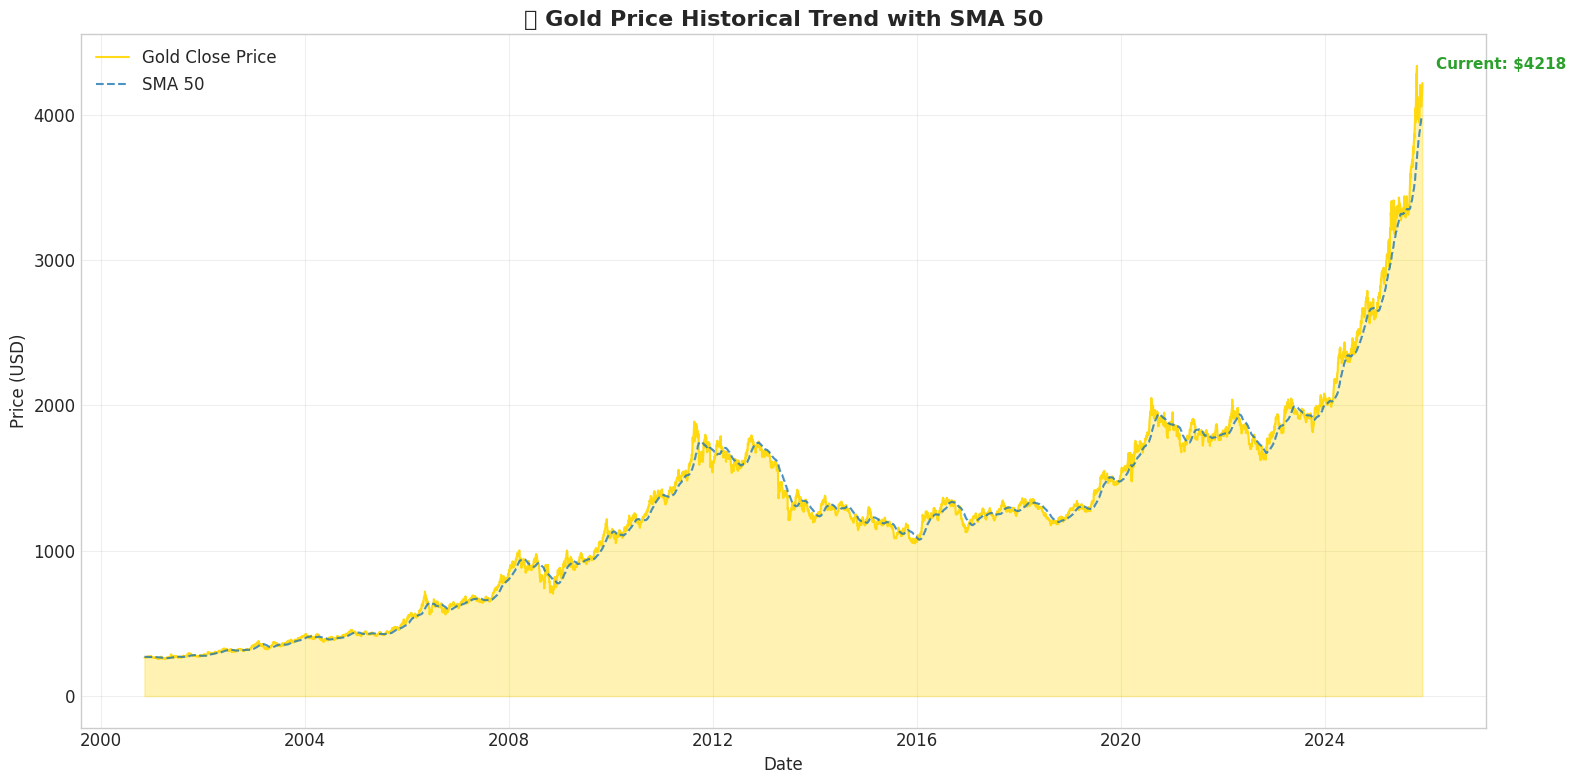

In [4]:
# 1.1 Gold Price Time Series with SMA
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(processed_df.index, processed_df['Gold_Close'], 
        label='Gold Close Price', color=COLORS['gold'], linewidth=1.5, alpha=0.9)
ax.plot(processed_df.index, processed_df['SMA_50'], 
        label='SMA 50', color=COLORS['primary'], linewidth=1.5, linestyle='--', alpha=0.8)

ax.fill_between(processed_df.index, processed_df['Gold_Close'], alpha=0.3, color=COLORS['gold'])

ax.set_title('📈 Gold Price Historical Trend with SMA 50', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Annotate current price
current_price = processed_df['Gold_Close'].iloc[-1]
ax.annotate(f'Current: ${current_price:.0f}', 
            xy=(processed_df.index[-1], current_price),
            xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='bold', color=COLORS['success'])

plt.tight_layout()
plt.show()

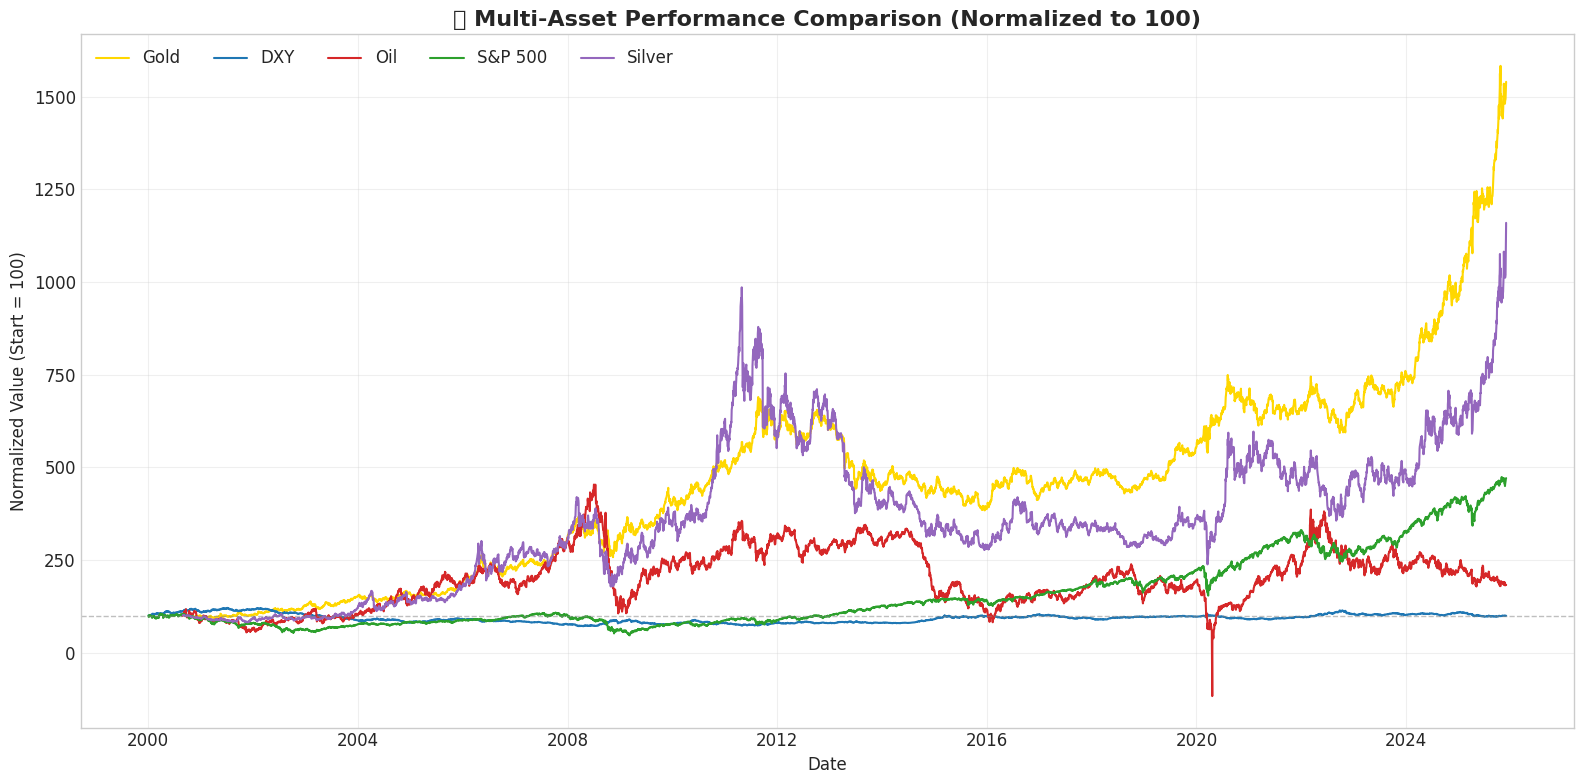

In [5]:
# 1.2 Multi-Asset Comparison (Normalized)
fig, ax = plt.subplots(figsize=(16, 8))

# Normalize to 100 at start
assets = {
    'Gold': gold_raw['Close'],
    'DXY': dxy_raw['Close'],
    'Oil': oil_raw['Close'],
    'S&P 500': sp500_raw['Close'],
    'Silver': silver_raw['Close']
}

colors_list = [COLORS['gold'], COLORS['primary'], COLORS['danger'], COLORS['success'], COLORS['purple']]

for i, (name, series) in enumerate(assets.items()):
    normalized = (series / series.iloc[0]) * 100
    ax.plot(normalized.index, normalized.values, label=name, linewidth=1.5, color=colors_list[i])

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.set_title('📊 Multi-Asset Performance Comparison (Normalized to 100)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Value (Start = 100)')
ax.legend(loc='upper left', ncols=5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

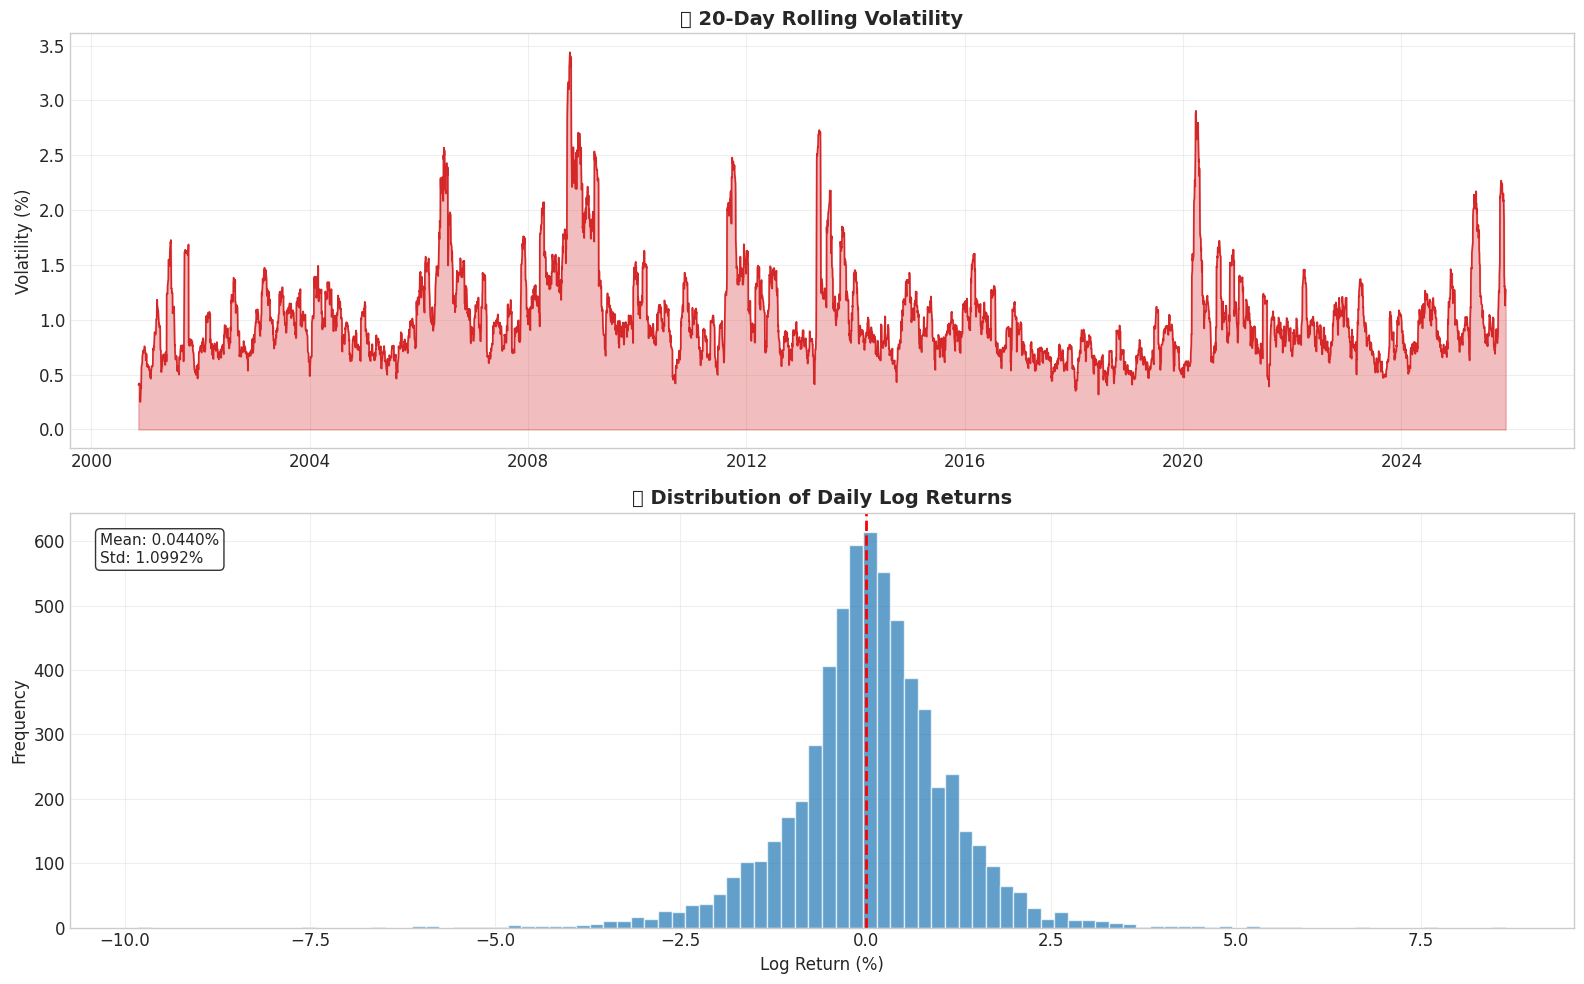

In [6]:
# 1.3 Volatility Analysis
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Volatility
axes[0].plot(processed_df.index, processed_df['Volatility_20d'] * 100, 
             color=COLORS['danger'], linewidth=1.2)
axes[0].fill_between(processed_df.index, processed_df['Volatility_20d'] * 100, 
                     alpha=0.3, color=COLORS['danger'])
axes[0].set_title('📉 20-Day Rolling Volatility', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Volatility (%)')
axes[0].grid(True, alpha=0.3)

# Log Return Distribution
axes[1].hist(processed_df['Log_Return'].dropna() * 100, bins=100, 
             color=COLORS['primary'], alpha=0.7, edgecolor='white')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('📊 Distribution of Daily Log Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Stats annotation
mean_ret = processed_df['Log_Return'].mean() * 100
std_ret = processed_df['Log_Return'].std() * 100
axes[1].annotate(f'Mean: {mean_ret:.4f}%\nStd: {std_ret:.4f}%', 
                 xy=(0.02, 0.95), xycoords='axes fraction',
                 fontsize=11, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

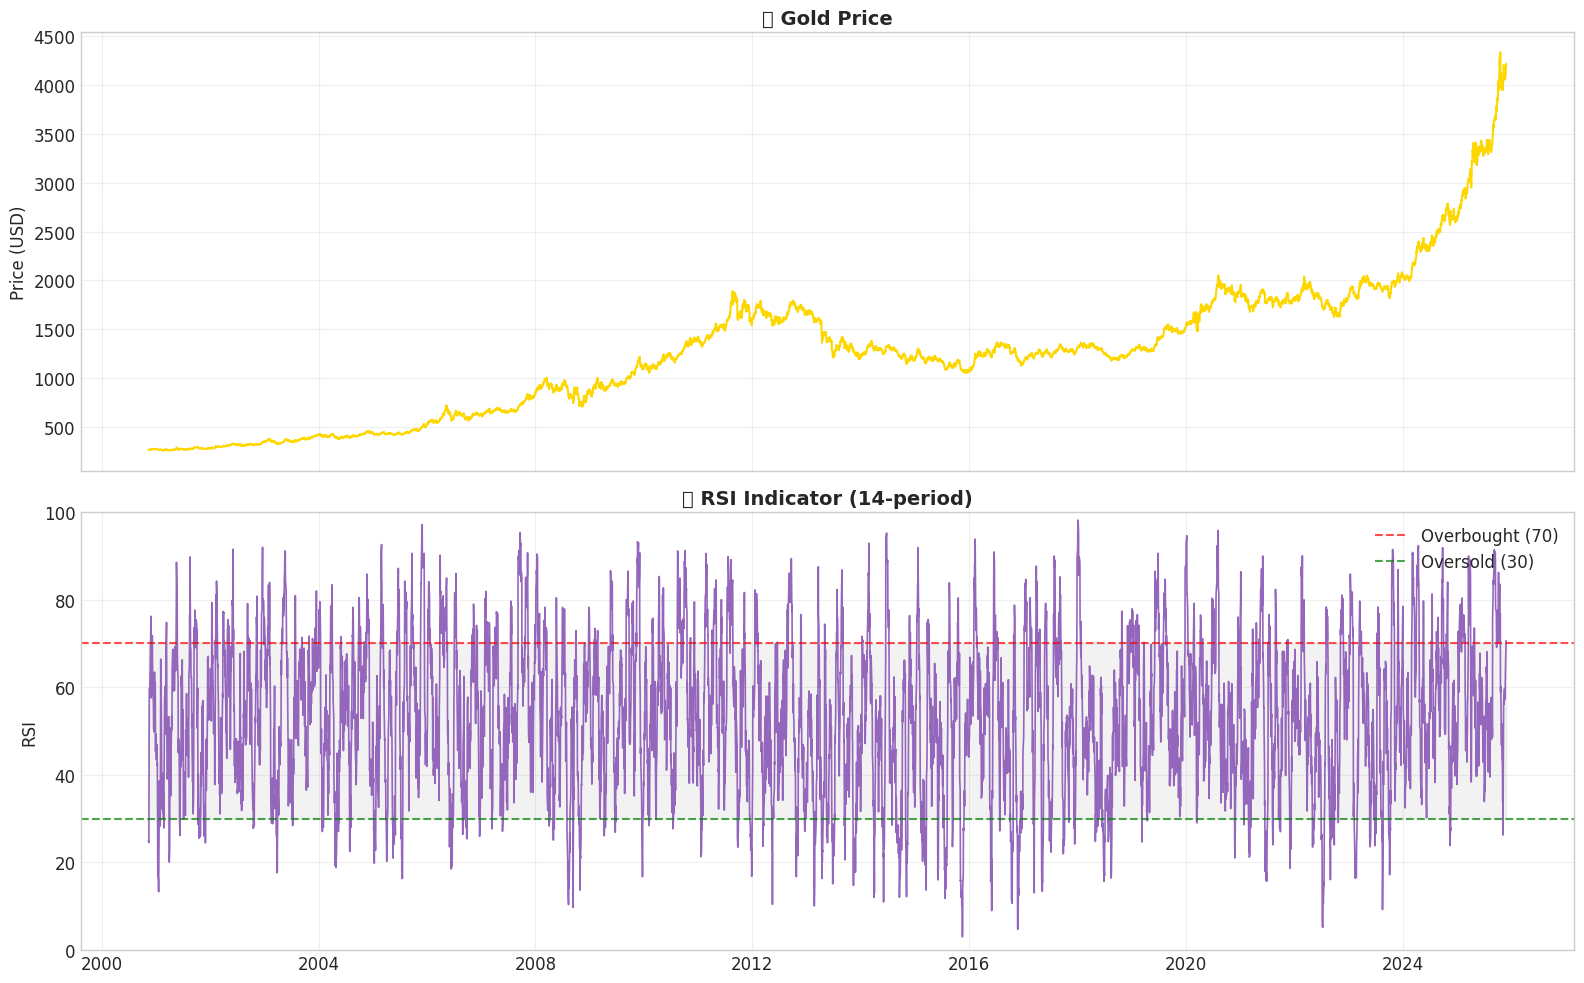

In [7]:
# 1.4 RSI Analysis
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Price
axes[0].plot(processed_df.index, processed_df['Gold_Close'], 
             color=COLORS['gold'], linewidth=1.5)
axes[0].set_title('📈 Gold Price', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, alpha=0.3)

# RSI
axes[1].plot(processed_df.index, processed_df['RSI'], 
             color=COLORS['purple'], linewidth=1.2)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
axes[1].fill_between(processed_df.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('📊 RSI Indicator (14-period)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].set_ylim(0, 100)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 🔍 2. Feature Analysis

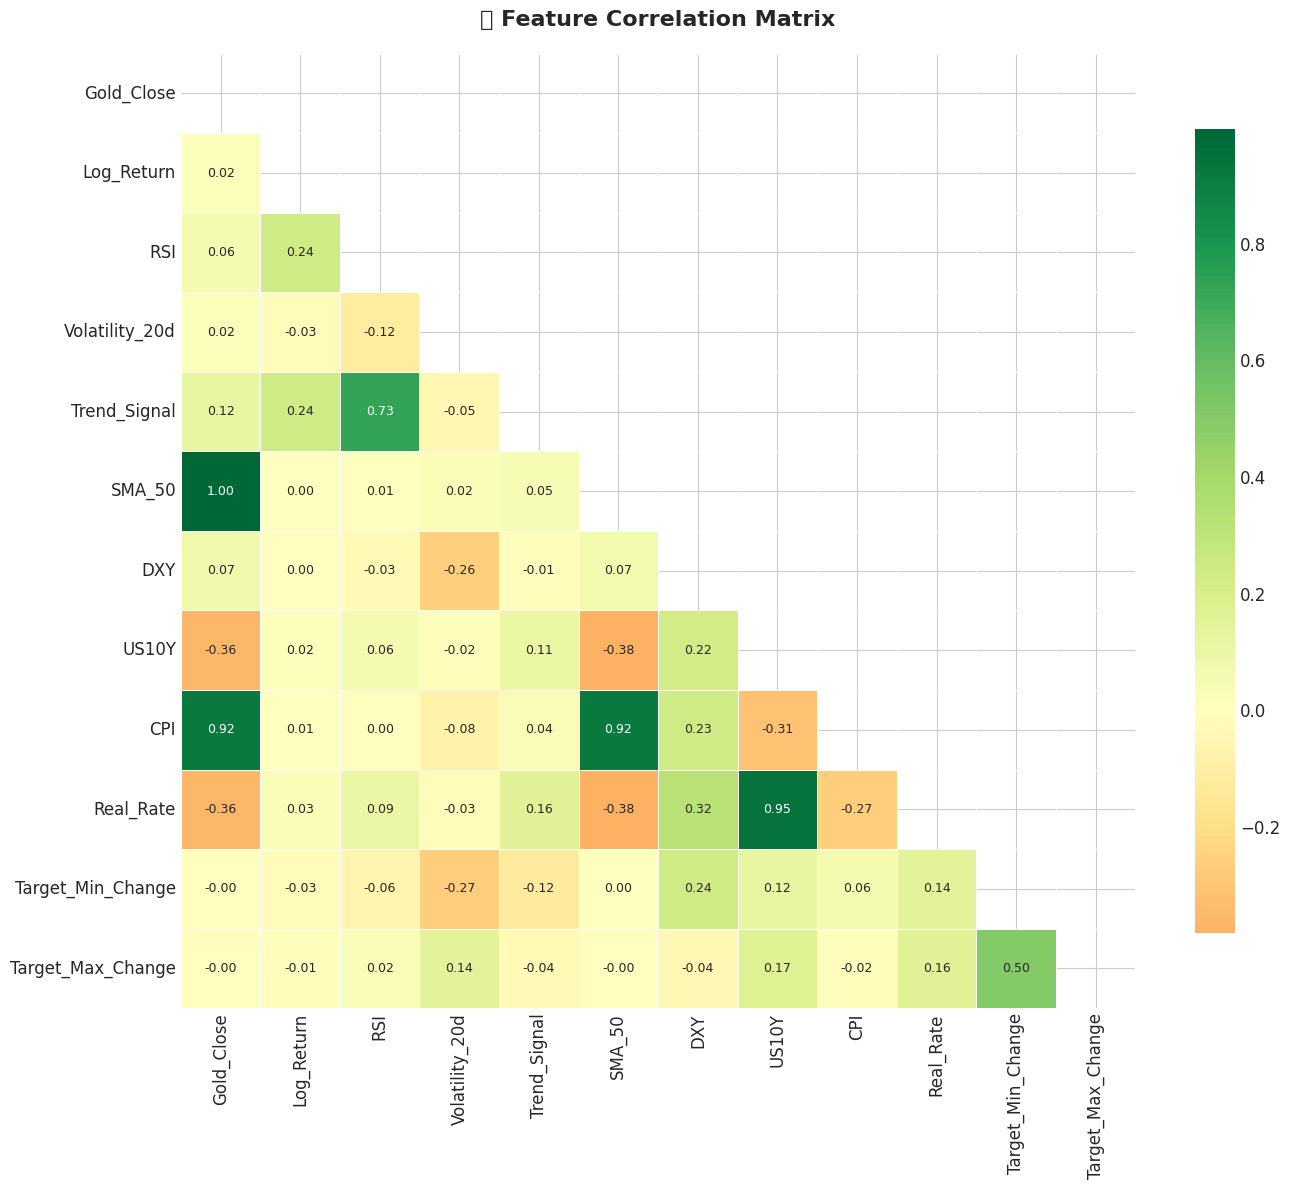

In [8]:
# 2.1 Feature Correlation Heatmap
feature_cols = ['Gold_Close', 'Log_Return', 'RSI', 'Volatility_20d', 'Trend_Signal', 'SMA_50',
                'DXY', 'US10Y', 'CPI', 'Real_Rate', 'Target_Min_Change', 'Target_Max_Change']

corr_matrix = processed_df[feature_cols].corr()

fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, 
            square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 9})

ax.set_title('🔍 Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

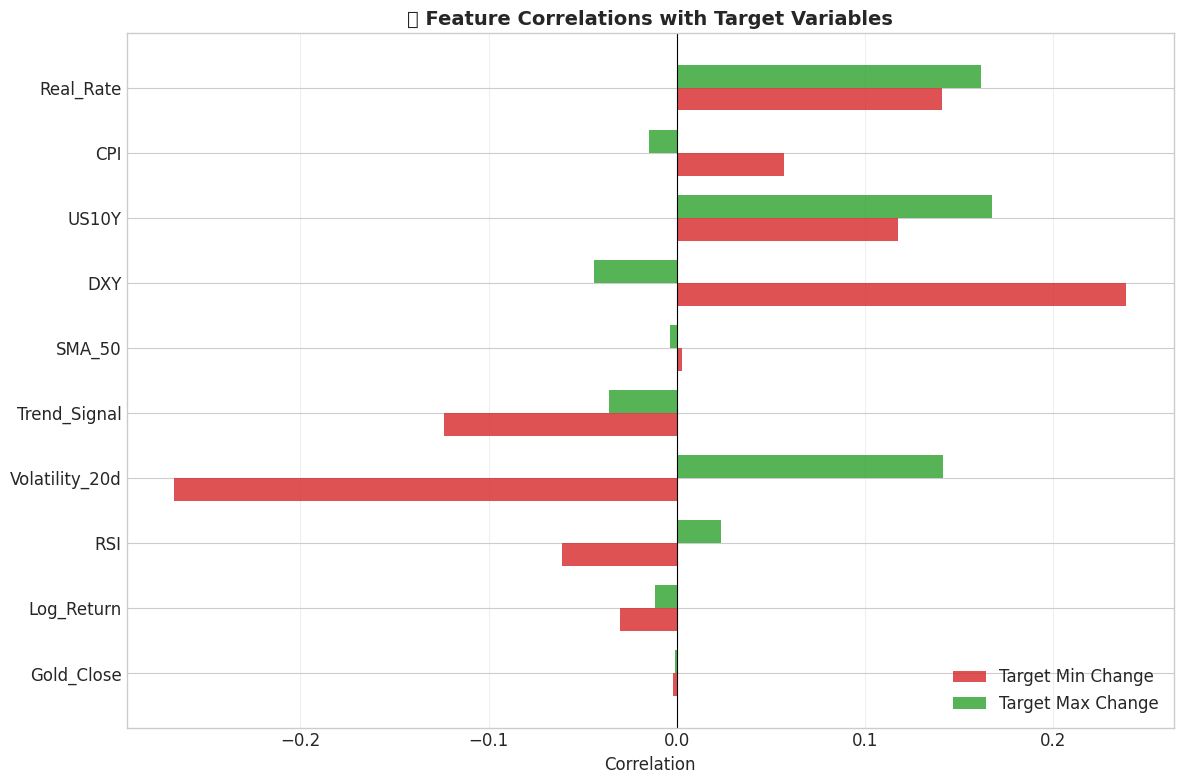

In [9]:
# 2.2 Key Feature Correlations with Target
target_corr = processed_df[feature_cols].corr()[['Target_Min_Change', 'Target_Max_Change']].drop(
    ['Target_Min_Change', 'Target_Max_Change'])

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(target_corr.index))
width = 0.35

bars1 = ax.barh(x - width/2, target_corr['Target_Min_Change'], width, 
                label='Target Min Change', color=COLORS['danger'], alpha=0.8)
bars2 = ax.barh(x + width/2, target_corr['Target_Max_Change'], width, 
                label='Target Max Change', color=COLORS['success'], alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(target_corr.index)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlabel('Correlation')
ax.set_title('📊 Feature Correlations with Target Variables', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

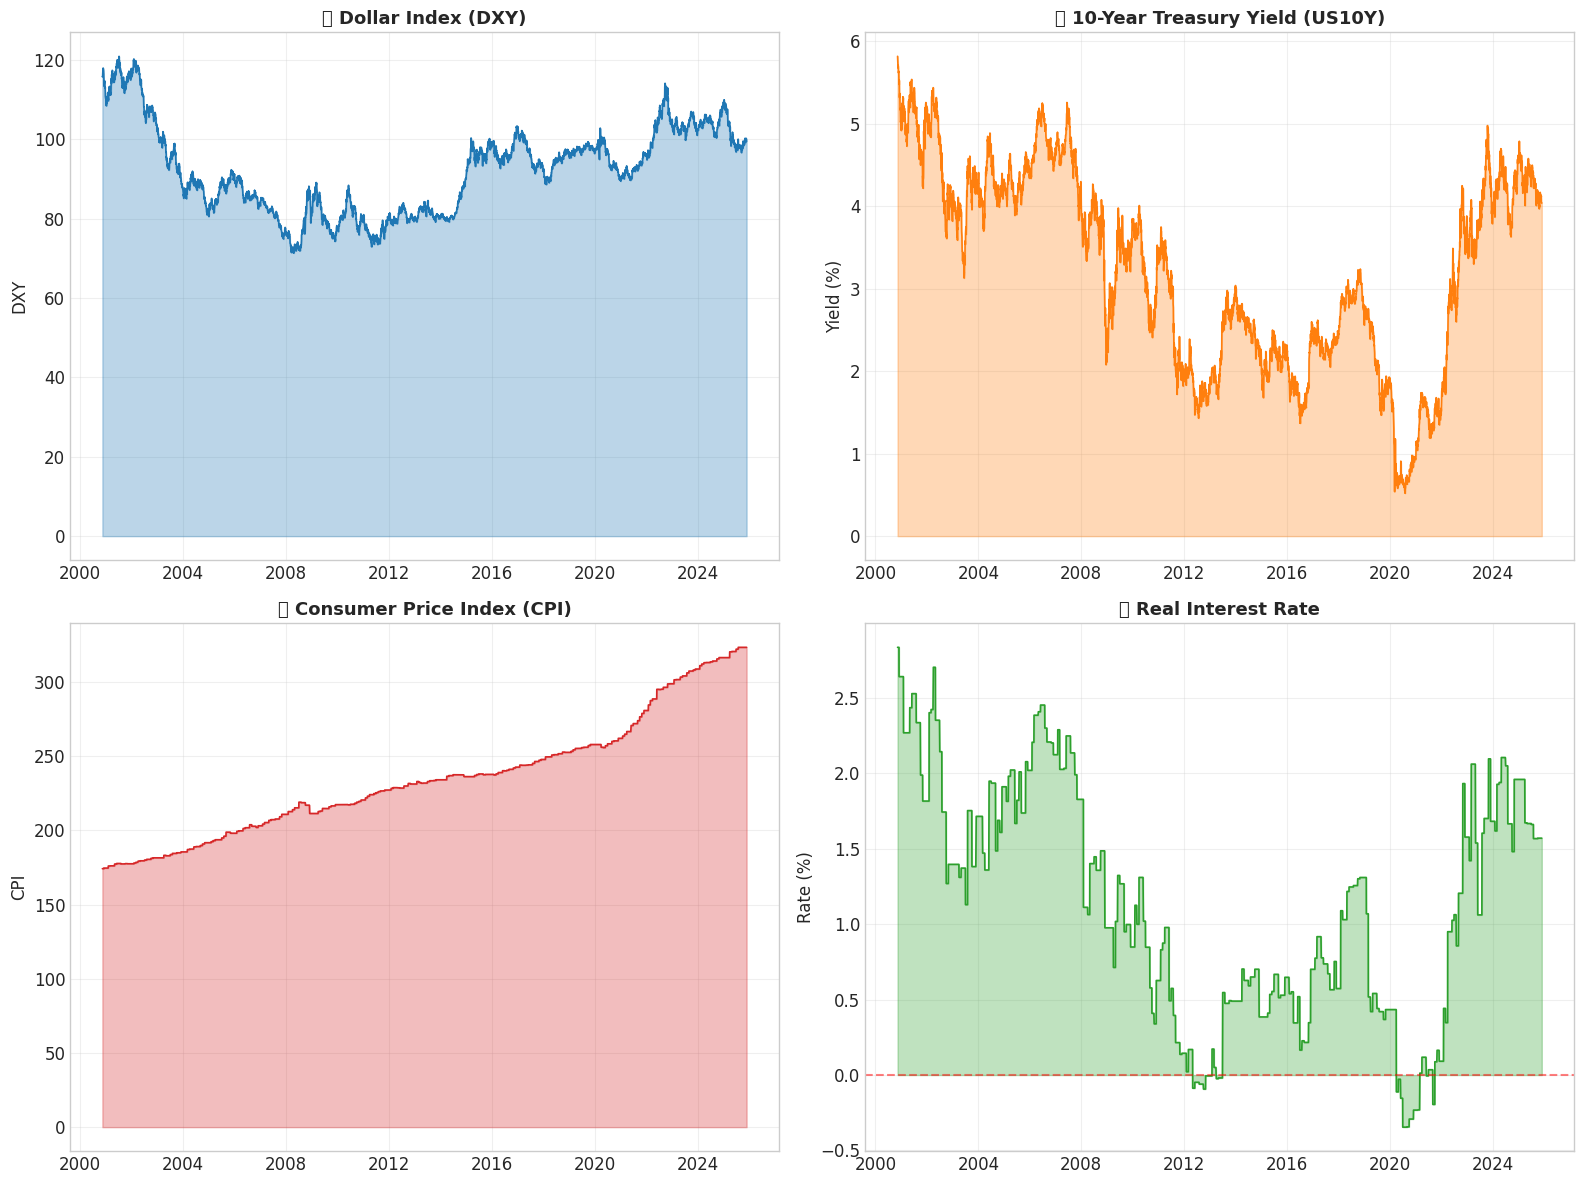

In [10]:
# 2.3 Macro Indicators Over Time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# DXY (Dollar Index)
axes[0, 0].plot(processed_df.index, processed_df['DXY'], color=COLORS['primary'], linewidth=1.2)
axes[0, 0].fill_between(processed_df.index, processed_df['DXY'], alpha=0.3, color=COLORS['primary'])
axes[0, 0].set_title('💵 Dollar Index (DXY)', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('DXY')
axes[0, 0].grid(True, alpha=0.3)

# US10Y
axes[0, 1].plot(processed_df.index, processed_df['US10Y'], color=COLORS['secondary'], linewidth=1.2)
axes[0, 1].fill_between(processed_df.index, processed_df['US10Y'], alpha=0.3, color=COLORS['secondary'])
axes[0, 1].set_title('📈 10-Year Treasury Yield (US10Y)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Yield (%)')
axes[0, 1].grid(True, alpha=0.3)

# CPI
axes[1, 0].plot(processed_df.index, processed_df['CPI'], color=COLORS['danger'], linewidth=1.2)
axes[1, 0].fill_between(processed_df.index, processed_df['CPI'], alpha=0.3, color=COLORS['danger'])
axes[1, 0].set_title('📊 Consumer Price Index (CPI)', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('CPI')
axes[1, 0].grid(True, alpha=0.3)

# Real Rate
axes[1, 1].plot(processed_df.index, processed_df['Real_Rate'], color=COLORS['success'], linewidth=1.2)
axes[1, 1].fill_between(processed_df.index, processed_df['Real_Rate'], alpha=0.3, color=COLORS['success'])
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_title('📉 Real Interest Rate', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 2.4 Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Min Change Distribution
axes[0].hist(processed_df['Target_Min_Change'].dropna() * 100, bins=60, 
             color=COLORS['danger'], alpha=0.7, edgecolor='white')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1.5)
axes[0].set_title('📉 Target Min Change Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Change (%)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Max Change Distribution
axes[1].hist(processed_df['Target_Max_Change'].dropna() * 100, bins=60, 
             color=COLORS['success'], alpha=0.7, edgecolor='white')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1.5)
axes[1].set_title('📈 Target Max Change Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Change (%)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 🤖 3. Model Performance

In [ ]:
# Display existing model performance figures
from IPython.display import Image, display
import os

FIGURES_PATH = '../artifacts/figures/'

# Training History
if os.path.exists(f'{FIGURES_PATH}training_history.png'):
    print("📊 Training History:")
    display(Image(filename=f'{FIGURES_PATH}training_history.png', width=800))
else:
    print("⚠️ Training history figure not found")

In [ ]:
# 3.1 Model Evaluation Metrics
import yaml
import sys
sys.path.append('..')

# Load settings
with open('../config/settings.yaml', 'r') as f:
    settings = yaml.safe_load(f)

print("📋 Model Configuration:")
print(f"  - Model Name: {settings['model']['name']}")
print(f"  - Hidden Dim: {settings['model']['hidden_dim']}")
print(f"  - Num Layers: {settings['model']['num_layers']}")
print(f"  - Dropout: {settings['model']['dropout']}")
print(f"  - Window Size: {settings['processing']['window_size']}")
print(f"  - Forecast Horizon: {settings['processing']['forecast_horizon']}")
print(f"  - Batch Size: {settings['training']['batch_size']}")
print(f"  - Epochs: {settings['training']['epochs']}")
print(f"  - Learning Rate: {settings['training']['learning_rate']}")

In [ ]:
# 3.2 Test Evaluation Chart
if os.path.exists(f'{FIGURES_PATH}test_evaluation_chart.png'):
    print("📈 Test Evaluation (YTD Performance):")
    display(Image(filename=f'{FIGURES_PATH}test_evaluation_chart.png', width=900))
else:
    print("⚠️ Test evaluation chart not found")

In [ ]:
# 3.3 Test Simulation Case
if os.path.exists(f'{FIGURES_PATH}test_simulation_case.png'):
    print("🔬 Test Simulation (Random Historical Case):")
    display(Image(filename=f'{FIGURES_PATH}test_simulation_case.png', width=900))
else:
    print("⚠️ Test simulation figure not found")

---
# 📉 4. Backtesting Results

In [ ]:
# 4.1 Backtest YTD Performance
if os.path.exists(f'{FIGURES_PATH}backtest_YTD.png'):
    print("📊 Backtest YTD Performance:")
    display(Image(filename=f'{FIGURES_PATH}backtest_YTD.png', width=900))
else:
    print("⚠️ Backtest YTD figure not found")

In [ ]:
# 4.2 Backtest Result
if os.path.exists(f'{FIGURES_PATH}backtest_result.png'):
    print("📈 Backtest Result:")
    display(Image(filename=f'{FIGURES_PATH}backtest_result.png', width=900))
elif os.path.exists(f'{FIGURES_PATH}sniper_backtest.png'):
    print("📈 Sniper Backtest Result:")
    display(Image(filename=f'{FIGURES_PATH}sniper_backtest.png', width=900))
else:
    print("⚠️ Backtest result figure not found")

In [ ]:
# 4.3 Performance Metrics Summary
print("\n" + "="*60)
print("📊 MODEL PERFORMANCE METRICS")
print("="*60)

metrics_html = """
<style>
    .metrics-table {
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 600px;
    }
    .metrics-table th, .metrics-table td {
        border: 1px solid #ddd;
        padding: 12px;
        text-align: left;
    }
    .metrics-table th {
        background-color: #4CAF50;
        color: white;
    }
    .metrics-table tr:nth-child(even) {
        background-color: #f2f2f2;
    }
</style>
<table class="metrics-table">
    <tr><th>Metric Category</th><th>Metric</th><th>Description</th></tr>
    <tr><td rowspan="4">Regression</td><td>MAE</td><td>Mean Absolute Error</td></tr>
    <tr><td>RMSE</td><td>Root Mean Square Error</td></tr>
    <tr><td>MAPE</td><td>Mean Absolute Percentage Error</td></tr>
    <tr><td>R²</td><td>Coefficient of Determination</td></tr>
    <tr><td>Direction</td><td>Accuracy</td><td>Prediction direction accuracy</td></tr>
    <tr><td rowspan="3">Financial</td><td>Win Rate</td><td>Profitable trades ratio</td></tr>
    <tr><td>Max Drawdown</td><td>Largest peak-to-trough decline</td></tr>
    <tr><td>Sharpe Ratio</td><td>Risk-adjusted return metric</td></tr>
</table>
"""

from IPython.display import HTML
display(HTML(metrics_html))

print("\n💡 Tip: Run 'python main.py --mode evaluate' to get actual metrics!")

---
# 🔮 5. Forecast Visualization

In [ ]:
# 5.1 Forecast Result
if os.path.exists(f'{FIGURES_PATH}forecast_result_final.png'):
    print("🔮 AI Forecast Result:")
    display(Image(filename=f'{FIGURES_PATH}forecast_result_final.png', width=900))
else:
    print("⚠️ Forecast result figure not found")

In [ ]:
# 5.2 Forecast Vision
if os.path.exists(f'{FIGURES_PATH}forecast_vision.png'):
    print("🌟 Forecast Vision:")
    display(Image(filename=f'{FIGURES_PATH}forecast_vision.png', width=900))
else:
    print("⚠️ Forecast vision figure not found")

In [ ]:
# 5.3 Load and Display Forecast Data
try:
    forecast_30 = pd.read_csv(f'{DATA_PATH}final/30day_forecast.csv')
    print("📅 30-Day Forecast Data:")
    display(forecast_30)
except:
    print("⚠️ 30-day forecast file not found")

try:
    forecast_60 = pd.read_csv(f'{DATA_PATH}final/60day_forecast.csv')
    print("\n📅 60-Day Forecast Data:")
    display(forecast_60)
except:
    print("⚠️ 60-day forecast file not found")

In [ ]:
# 5.4 Custom Forecast Visualization
# Recent 100 days + Forecast range
recent_days = 100
recent_data = processed_df.tail(recent_days)

fig, ax = plt.subplots(figsize=(16, 8))

# Historical
ax.plot(recent_data.index, recent_data['Gold_Close'], 
        label='Historical Price', color='black', linewidth=2)

# Current point
current_date = recent_data.index[-1]
current_price = recent_data['Gold_Close'].iloc[-1]
ax.scatter([current_date], [current_price], color='blue', s=100, zorder=5)
ax.annotate(f' Current: ${current_price:.0f}', 
            xy=(current_date, current_price),
            fontsize=11, fontweight='bold', color='blue')

# Forecast range (estimated +/- 5%)
forecast_days = 30
forecast_dates = pd.date_range(start=current_date + pd.Timedelta(days=1), periods=forecast_days)

# Simple forecast estimate for visualization
forecast_min = current_price * 0.95  # -5%
forecast_max = current_price * 1.08  # +8%

ax.plot([current_date, forecast_dates[-1]], [current_price, forecast_min], 
        color='red', linestyle='--', alpha=0.6)
ax.plot([current_date, forecast_dates[-1]], [current_price, forecast_max], 
        color='green', linestyle='--', alpha=0.6)
ax.fill_between([current_date, forecast_dates[-1]], 
                [current_price, forecast_min], [current_price, forecast_max],
                color='green', alpha=0.15, label='AI Forecast Range')

# Forecast markers
ax.scatter([forecast_dates[-1]], [forecast_min], color='red', marker='v', s=100)
ax.scatter([forecast_dates[-1]], [forecast_max], color='green', marker='^', s=100)
ax.annotate(f' Min: ${forecast_min:.0f}', xy=(forecast_dates[-1], forecast_min), 
            color='red', fontsize=10, verticalalignment='top')
ax.annotate(f' Max: ${forecast_max:.0f}', xy=(forecast_dates[-1], forecast_max), 
            color='green', fontsize=10)

ax.set_title('🔮 Gold Price 30-Day Forecast Visualization', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 📊 Summary Statistics

In [ ]:
# Summary Statistics
print("\n" + "="*60)
print("📊 GOLD PRICE SUMMARY STATISTICS")
print("="*60)

current_price = processed_df['Gold_Close'].iloc[-1]
price_52w_high = processed_df['Gold_Close'].tail(252).max()
price_52w_low = processed_df['Gold_Close'].tail(252).min()
avg_volatility = processed_df['Volatility_20d'].tail(252).mean() * 100

ytd_start = processed_df[processed_df.index.year == datetime.now().year]['Gold_Close'].iloc[0]
ytd_return = (current_price / ytd_start - 1) * 100

print(f"📌 Current Price:     ${current_price:,.2f}")
print(f"📈 52W High:          ${price_52w_high:,.2f}")
print(f"📉 52W Low:           ${price_52w_low:,.2f}")
print(f"📊 Avg Volatility:    {avg_volatility:.2f}%")
print(f"📈 YTD Return:        {ytd_return:+.2f}%")
print(f"📅 Data Points:       {len(processed_df):,}")
print("="*60)

In [ ]:
# Feature Statistics
print("\n📊 FEATURE STATISTICS (Last 30 Days)")
print("="*60)

recent_30 = processed_df.tail(30)

stats_df = recent_30[['Gold_Close', 'RSI', 'Volatility_20d', 'DXY', 'US10Y', 'Real_Rate']].describe()
stats_df = stats_df.loc[['mean', 'std', 'min', 'max']]
stats_df.index = ['Mean', 'Std Dev', 'Min', 'Max']

# Format the display
styled_stats = stats_df.style.format({
    'Gold_Close': '${:,.2f}',
    'RSI': '{:.2f}',
    'Volatility_20d': '{:.4f}',
    'DXY': '{:.2f}',
    'US10Y': '{:.2f}%',
    'Real_Rate': '{:.2f}%'
}).set_caption('Feature Statistics (Last 30 Days)')

display(styled_stats)

---
## 🏁 End of Notebook

**Các lệnh hữu ích:**
```bash
# Train model
python main.py --mode train

# Evaluate model
python main.py --mode evaluate

# Generate forecast
python main.py --mode predict

# Visualize results
python main.py --mode visualize
```